# ** Sentiment Analysis **

In [ ]:
import nltk
nltk.download('punkt')
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
#read in the data using pandas
df1 = pd.read_csv('/content/all_review_clean(2018-2022).csv')
#check data has been read in properly
df1.head()


,Year,Data_Source,Review
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...
2,2022,Airline Rating,normal mile year think ofd remount experience ...
3,2022,Airline Rating,american airline literally ruin trip good angr...
4,2022,Airline Rating,horse airline ont recommend travel american ai...


## Giving labels to the reviews using Vader

I used Vader lexicon to give labels to the reviews because they are social media reviews

VADER (Valence Aware Dictionary and sEntiment Reasoner): VADER is a widely used lexicon specifically designed for social media text. It includes both positive and negative sentiment words, as well as intensifiers and negations. VADER is known for its effectiveness in analyzing short and informal text, making it suitable for social media posts and reviews, including airline reviews.

In [ ]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Custom sentiment scores for specific words
custom_scores = {
    "accommodating": 1,
    "amenities":0.5,
    "announcements":1,
    "arrival":0.3,
    "arrive":0.3,
    "attendant": 0,
    "attentive": 1,
    "awful": -1,
    "bad": -1,
    "bag": 0,
    "baggage": 0,
    "boarding": 0,
    "booking": 0.5,
    "business":0,
    "cabin": 0,
    "cancel": -3,
    "change":-1,
    "check": 0.5,
    "claim": 0.5,
    "clean": 1,
    "cleanliness": 1,
    "comfort": 3,
    "comfortable": 3,
    "compensation": 2,
    "complain": -1,
    "complaint": -1,
    "confuse": -2,
    "connecting":0.3,
    "connection":0.3,
    "connections":0.3,
    "convenient": 1,
    "counter":0.3,
    "courteous": 1,
    "courtesy": 1,
    "cramped": -1,
    "crew": 0,
    "crowd": -1,
    "crowded": -1,
    "custom": 0,
    "customs": 0,
    "delay": -3,
    "delayed": -3,
    'delays': -3,
    "delivery": 1,
    "departure":0.3,
    "deplaning": -0.3,
    "dirty": -1,
    "disorganized": -1,
    "dissatisfied": -0.7,
    "document": 0,
    "domestic": 0,
    "early": 1,
    "easy": 1,
    "economy": 0,
    "efficient": 1,
    "efficient": 1,
    "enjoyable": 1,
    "entertainment":0.5,
    "excellent": 1,
    "exit":0.3,
    "experience": 0,
    "first": 1,
    "flight": 0,
    "food": 1,
    "friendly": 1,
    "frustrate": -1,
    "gate": 0,
    "gate":0.3,
    "great": 1,
    "ground": 0,
    "handling": 1,
    "helpful": 1,
    "immigration": 0,
    "inconvenience": -1,
    "inconvenient": -1,
    "instructions":0.3,
    "international": 0,
    "landing": 0.3,
    "late": -1,
    "lavatory":0.3,
    "legroom":0.3,
    "lose": -1,
    "lost": -1,
    "lounge": 0,
    "loyalty": 1,
    "luggage": 0.5,
    "miscommunicate": -1,
    "miss": -1,
    "neat": 1,
    "noisy": -1,
    "offer":0.3,
    "on time": 1,
    "onboard": 0,
    "organized": 1,
    "outstanding": 1,
    "overbook": -3,
    "overhead":0.3,
    "pass":0.3,
    "passport": 0,
    "pleasant": 1,
    "poor": -1,
    "premium":0.3,
    "price": 0.1,
    "priority": 1,
    "process": 0.1,
    "quality": 1,
    "queue": -1,
    "quick": 1,
    "refund": 1,
    "reliable": 1,
    "reschedule": -2,
    "responsive":0.3,
    "rude": -1,
    "safety": 1,
    "satisfaction": 1,
    "satisfied":0.3,
    "satisfying": 1,
    "screen": 0,
    "screening":0.3,
    "seat": 1,
    "security": 0,
    "security":0.3,
    "service": 0.5,
    "slow": -1,
    "smooth": 1,
    "space":0.3,
    "spacious": 1,
    "staff": 0,
    "standard":0.3,
    "takeoff": 0,
    "tasty": 1,
    "terminal":0.3,
    "terrible": -1,
    "ticket": 0,
    "time": 0.5,
    "timely": 1,
    "transfer":0.3,
    "turbulence": -1,
    "turbulent": -1,
    "uncomfortable": -1,
    "unprofessional": -1,
    "unsafe": -1,
    "upgrade":0.3,
    "visa": 0,
    "wait": -1,
    "welcome": 1,
    "welcoming": 1,
    "wi-fi":0.3,
    "window": 0.1,
    "queue":-3
}



# Create a SentimentIntensityAnalyzer instance
sia = SentimentIntensityAnalyzer()

# Update VADER lexicon with custom scores
vader_lexicon = sia.lexicon.copy()
vader_lexicon.update(custom_scores)
sia.lexicon = vader_lexicon

# Function to calculate sentiment score using VADER
def score_vader(row):
    text = row["Review"]  # Assuming "Review" is the column containing the text
    return sia.polarity_scores(text)["compound"]

# Apply sentiment scoring to DataFrame
df1["sentiment_scores"] = df1.apply(score_vader, axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df1

,Year,Data_Source,Review,sentiment_scores
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280
...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042


<Axes: ylabel='Frequency'>

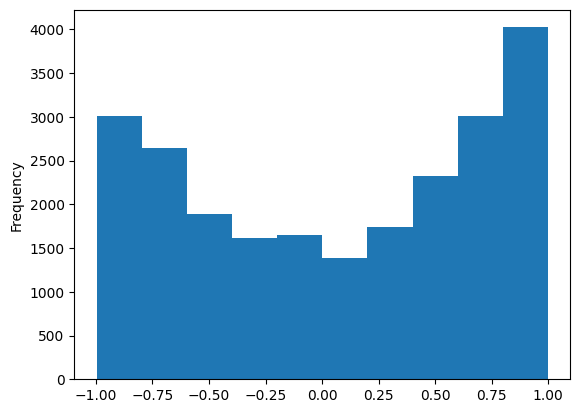

In [ ]:
df1["sentiment_scores"].plot(kind="hist")

In [ ]:
# Function to label sentiment based on VADER score
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"


# Apply the sentiment labeling function to create the 'sentiment_label' column
df1["sentiment_label"] = df1["sentiment_scores"].apply(label_sentiment)

In [ ]:
df1

,Year,Data_Source,Review,sentiment_scores,sentiment_label
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive
...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive


In [ ]:
def label_sentiment(score):
    if score > 0:
        return 1  # Positive sentiment
    elif score < 0:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment


In [ ]:
df1

,Year,Data_Source,Review,sentiment_scores,sentiment_label
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive
...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive


In [ ]:
# Identify rows with NaN values in the "sentiment_label" column
rows_with_nan = df1[df1["sentiment_label"].isnull()]

# Print the rows with NaN sentiment labels
print(rows_with_nan)


Empty DataFrame
Columns: [Year, Data_Source, Review, sentiment_scores, sentiment_label]
Index: []


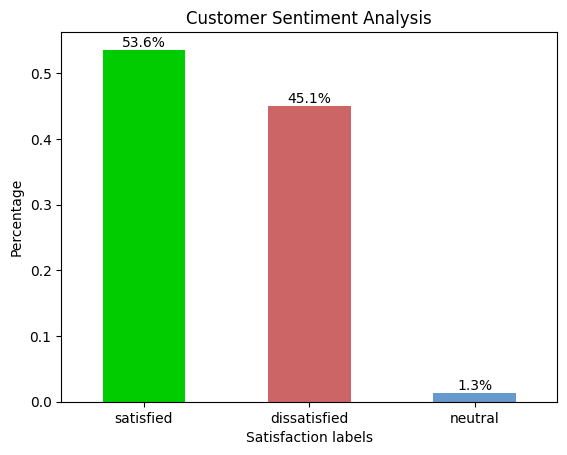

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Import Seaborn for color palette

# Create a new DataFrame for drawing with modified labels
df_draw = df1.copy()
df_draw["sentiment_label"] = df_draw["sentiment_label"].map({"positive": "satisfied", "negative": "dissatisfied", "neutral": "neutral"})

# color palette with shades of green red , and  blue,
color_palette = sns.color_palette(["#00cc00",  "#cc6666", "#6699cc"])

# Plot the bar chart with different colors for different sentiment labels
ax = df_draw["sentiment_label"].value_counts(normalize=True).plot(kind="bar", color=color_palette)

# Set labels and title
plt.xlabel("Satisfaction labels")
plt.ylabel("Percentage")
plt.title("Customer Sentiment Analysis")
plt.xticks(rotation=0)

# Add percentage text on top of the bars
total = len(df_draw["sentiment_label"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
df1

,Year,Data_Source,Review,sentiment_scores,sentiment_label
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive
...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive


## Starting the naive baye

### split into test and train



the ramdom state is 1 so we get the same set of split when the model is run again

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = df1['Review']
y = df1['sentiment_label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

# Print the size of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 18639
Testing set size: 4660


### Convert the text data into numerical features using CountVectorizer:

Because Naive Baye cant use text,it needs numbers

In [ ]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)

### Train the MultinomialNB classifier with the transformed data

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [ ]:
# Convert the text data into numerical features using CountVectorizer for the test set
X_test_counts = vectorizer.transform(X_test)

# Make predictions on the test data using the trained Naive Bayes classifier
y_pred = nb_classifier.predict(X_test_counts)



In [ ]:
# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8085836909871245


In [ ]:
# You can also calculate other metrics like precision, recall, and F1-score if needed
# For a binary classification task like sentiment analysis, you can use classification_report from scikit-learn
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.77      0.83      0.80      2069
     neutral       0.00      0.00      0.00        53
    positive       0.84      0.81      0.83      2538

    accuracy                           0.81      4660
   macro avg       0.54      0.55      0.54      4660
weighted avg       0.80      0.81      0.80      4660



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
### Trying my sentiment for prediction in new reviews

new_review = "This flight delayed me."
# You need to transform the new review using the same CountVectorizer object
new_review_counts = vectorizer.transform([new_review])
# Make a prediction for the new review
new_review_sentiment = nb_classifier.predict(new_review_counts)[0]

# Convert the predicted label back to the sentiment label (positive/negative)
if new_review_sentiment == 1:
    sentiment_label = "positive"
else:
    sentiment_label = "negative"

print("Predicted sentiment for the new review:", sentiment_label)


Predicted sentiment for the new review: negative


# **SVM**


In [ ]:
from sklearn.svm import SVC

# Convert the text data into numerical features using CountVectorizer for the entire dataset
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(df1['Review'])

# Split into features (X) and target (y)
X = X_counts
y = df1['sentiment_label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the SVM classifier with the transformed data
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data using the trained SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

#calculate other metrics like precision, recall, and F1-score if needed
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8993562231759656
              precision    recall  f1-score   support

    negative       0.89      0.90      0.90      2069
     neutral       0.04      0.04      0.04        53
    positive       0.92      0.91      0.92      2538

    accuracy                           0.90      4660
   macro avg       0.62      0.62      0.62      4660
weighted avg       0.90      0.90      0.90      4660



In [ ]:
# Predict sentiment for a new review
new_review = "the delay was too much"
# You need to transform the new review using the same CountVectorizer object
new_review_counts = vectorizer.transform([new_review])
# Make a prediction for the new review
new_review_sentiment = svm_classifier.predict(new_review_counts)[0]

# Convert the predicted label back to the sentiment label (positive/negative)
if new_review_sentiment == "positive":
    sentiment_label = "positive"
elif new_review_sentiment == "negative":
    sentiment_label = "negative"
else:
    sentiment_label = "neutral"

print("Predicted sentiment for the new review:", sentiment_label)


Predicted sentiment for the new review: negative


In [ ]:
# Assuming that df1 is the DataFrame with all the reviews and their sentiments
df1.to_csv('all_reviews_with_sentiments(2018-2022).csv', index=False)

# **Selection for manual evaluation**

In [ ]:
# Assuming you already have your DataFrame df1 with sentiment labels

# Randomly select 10 rows with mixed sentiment (5 positive and 5 negative)
positive_samples = df1[df1['sentiment_label'] == 'positive'].sample(n=10, random_state=1)
negative_samples = df1[df1['sentiment_label'] == 'negative'].sample(n=10, random_state=1)

# Concatenate the positive and negative samples
selected_samples = pd.concat([positive_samples, negative_samples])

# Shuffle the rows randomly
selected_samples = selected_samples.sample(frac=1, random_state=1).reset_index(drop=True)

# Print or use the selected_samples DataFrame
selected_samples


,Year,Data_Source,Review,sentiment_scores,sentiment_label
0,2018,TripAdvisor,book economy booking use alaska airline point ...,0.6705,positive
1,2018,Skytrax,wife year anniversary purchase ticket year ago...,-0.7579,negative
2,2019,TripAdvisor,fly different airline usually economy overall ...,0.3182,positive
3,2019,TripAdvisor,original flight cancel employee steven home da...,-0.1280,negative
4,2020,TripAdvisor,fly wilmingtonof purchase class trip seat comf...,0.8834,positive
5,2019,TripAdvisor,flight turk smooth easy fly diam small plane t...,-0.7650,negative
6,2019,TripAdvisor,beautiful plane entertainment system way light...,0.8375,positive
7,2022,Skytrax,delay austin hour reason run gate baby catch g...,-0.8519,negative
8,2019,TripAdvisor,tend choose flight base price duration select ...,0.7845,positive
9,2018,TripAdvisor,fly son airplane help bit row seat comfortable...,0.9274,positive


In [ ]:
# Save the selected_samples DataFrame to a CSV file
selected_samples.to_csv('selected_samples.csv', index=False)